In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os,sys
import cv2

import tensorflow as tf
from tensorflow import keras
from keras import initializers
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import pickle as p
from tensorflow.keras import layers, models
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix 
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array



initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=100)

def Upload_Dataset(Dataset_Path):
   
    Path_train_Dataset = Dataset_Path+"/train"
    Path_test_Dataset = Dataset_Path+"/test"
    Path_val_Dataset = Dataset_Path+"/val"
   
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = [], [], []
    Output_train, Output_test, Output_val = [], [], []

    for j in os.listdir(Path_train_Dataset):

        if j != ".DS_Store":
            #print(j)
            for k in os.listdir(Path_train_Dataset+"/"+j):
                img=cv2.imread(Path_train_Dataset+"/"+j+"/"+k)
                Input_train_Dataset.append(cv2.resize(img, (224, 224)))
                if(j == 'brain'):
                    print('0 Entered ',j)
                    Output_train.append(int(0))
                elif(j == 'ewer'):
                    print('1 Entered ',j)
                    Output_train.append(int(1))
                elif(j == 'helicopter'):
                    print('2 Entered ',j)
                    Output_train.append(int(2))
                elif(j == 'scorpion'):
                    print('3 Entered ',j)
                    Output_train.append(int(3))
                else:
                    print('4 Entered ',j)
                    Output_train.append(int(4))

            for k in os.listdir(Path_test_Dataset+"/"+j):
                img=cv2.imread(Path_test_Dataset+"/"+j+"/"+k)
                Input_test_Dataset.append(cv2.resize(img, (224, 224)))
                if(j == 'brain'):
                    Output_test.append(int(0))
                elif(j == 'ewer'):
                    Output_test.append(int(1))
                elif(j == 'helicopter'):
                    Output_test.append(int(2))
                elif(j == 'scorpion'):
                    Output_test.append(int(3))
                else:
                    Output_test.append(int(4))

            for k in os.listdir(Path_val_Dataset+"/"+j):
                img=cv2.imread(Path_val_Dataset+"/"+j+"/"+k)
                Input_val_Dataset.append(cv2.resize(img, (224, 224)))
                if(j == 'brain'):
                    Output_val.append(int(0))
                elif(j == 'ewer'):
                    Output_val.append(int(1))
                elif(j == 'helicopter'):
                    Output_val.append(int(2))
                elif(j == 'scorpion'):
                    Output_val.append(int(3))
                else:
                    Output_val.append(int(4))
       
    #print(Output_train)            
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = np.array(Input_train_Dataset), np.array(Input_test_Dataset), np.array(Input_val_Dataset)
    #Output_train, Output_test, Output_val = np.array(list(map(int, Output_train))), np.array(list(map(int, Output_test))), np.array(list(map(int, Output_val)))
    Output_train, Output_test, Output_val = np.array(Output_train), np.array(Output_test), np.array(Output_val)
    #print(Output_train)
    return Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val
#providing path of  Caltech-101 dataset
Dataset_Path = "/content/drive/MyDrive/DLA5/Group_1"

#calling Upload_Dataset function
trainInp, testInp,valInp, trainOut, testOut, valOut= Upload_Dataset(Dataset_Path)

#Architecture1
model = models.Sequential()
#First Layer
model.add(layers.Conv2D(8, (11, 11), strides=4,activation='relu',name='conv1', padding='valid',input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((3, 3,), strides=2,name='MaxPool1', padding='valid'))

#Second Layer
model.add(layers.Conv2D(16, (5, 5), strides=1,activation='relu',name='conv2',padding='valid', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((3, 3,), strides=2, name='MaxPool2',padding='valid'))
#3 Layer
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', name='hiddenLayer'))
#4th layer
model.add(layers.Dense(5, activation='softmax', name='outputLayer'))

model.summary()

optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-6,name='Adam')

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x = trainInp, y = trainOut, batch_size = 32, epochs = 10000, verbose = "auto", callbacks=[es], validation_data=(valInp,  valOut), validation_batch_size=1)

model.save('/content/drive/MyDrive/DLA5/a1.h5')
f=open('/content/drive/MyDrive/DLA4/Histae32.pckl','wb')
p.dump(history.history,f)
f.close()

'''Dataset used for prediction and evaluation  data'''
trainEncode=model.predict(trainInp)
valEncode=model.predict(valInp)
testEncode=model.predict(testInp)

#a,b-part

print('\nEvaluation of model on train data:')
trainAcc=model.evaluate(x=trainInp,y=trainOut,batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(trainAcc)

print('\nEvaluation of model on validation data:')
valAcc=model.evaluate(x=valInp, y=valOut, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(valAcc)

print('\nEvaluation of model on test data:')
testAcc=model.evaluate(x=testInp, y=testOut, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(testAcc)

print('\nPredictions for test data:')
testProb=model.predict(testInp, batch_size=1, verbose="auto", callbacks=None)
pred=np.argmax(testProb,axis=1)
print(pred)

'''3-3'''
#confusionMatrix=confusion_matrix(Output_test, pred)
confusionMatrix=confusion_matrix(testOut,pred)
#confusionMatrix=tf.math.confusion_matrix(Output_test, pred5)
print(confusionMatrix)



0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Ente

8/8 [==============================] - 0s 53ms/step
(250, 54, 54, 8)


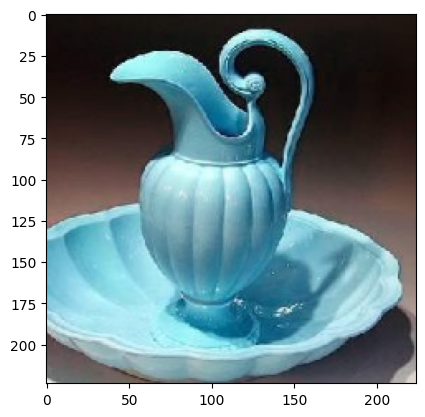

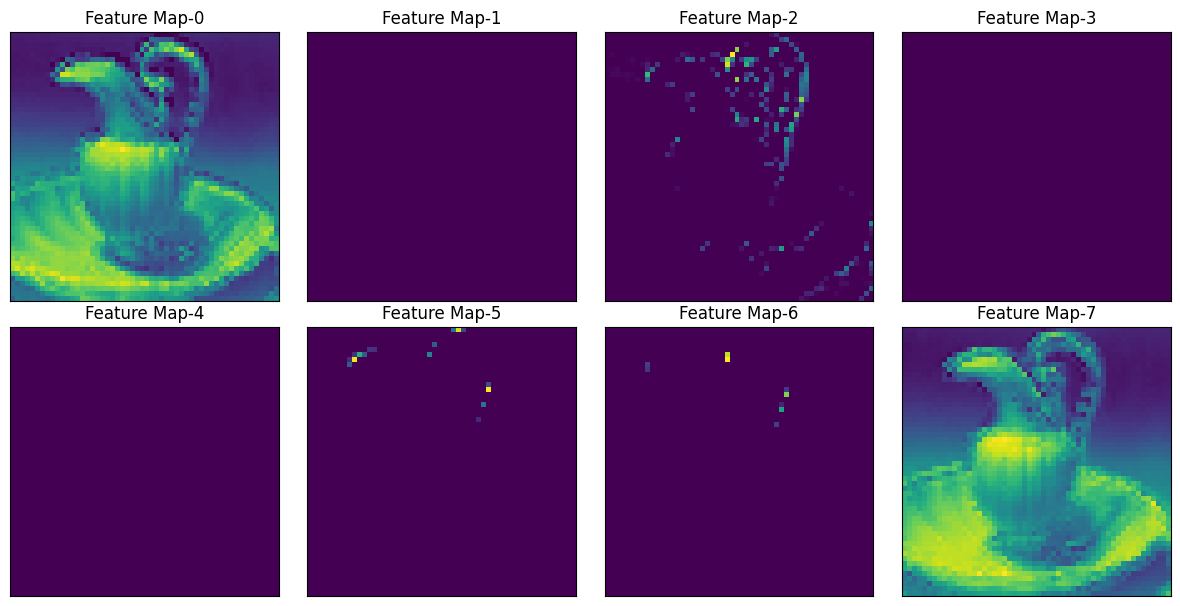

In [4]:
plt.imshow(trainInp[50])
#img=trainInp[0]
modelConv1 = Model(inputs=model.inputs, outputs=model.get_layer('conv1').output)
conv1FM = modelConv1.predict(trainInp)
print(conv1FM.shape)
plt.figure(figsize=(15,15))
for i in range(8):
    #displaying original image
    #clss=n
    #idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(4,4,i+1)
    plt.title('Feature Map-'+str(i))
    plt.imshow(conv1FM[50][ :, :, i])
    plt.subplots_adjust(hspace=0.1, wspace=0.1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
#for i in range(8):
        #plt.imshow(conv1FM[0][ :, :, i])
plt.show()

8/8 [==============================] - 1s 116ms/step
(250, 22, 22, 16)


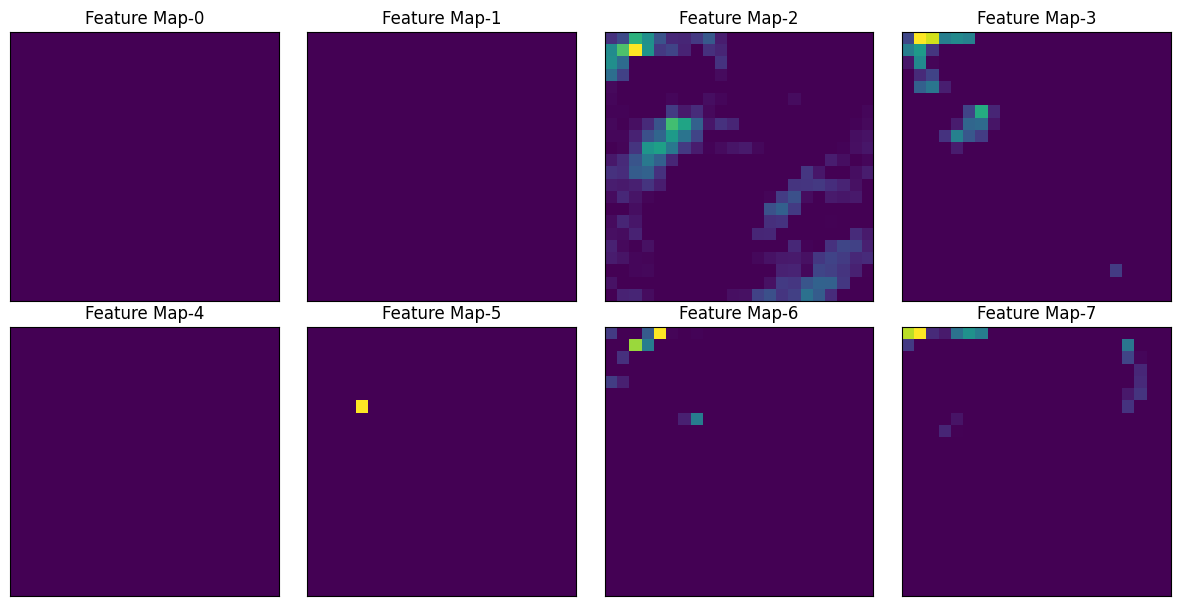

In [5]:

modelConv1 = Model(inputs=model.inputs, outputs=model.get_layer('conv2').output)
conv1FM = modelConv1.predict(trainInp)
print(conv1FM.shape)
plt.figure(figsize=(15,15))
for i in range(8):
    #displaying original image
    #clss=n
    #idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(4,4,i+1)
    plt.title('Feature Map-'+str(i))
    plt.imshow(conv1FM[50][ :, :, i])
    plt.subplots_adjust(hspace=0.1, wspace=0.1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
#for i in range(8):
        #plt.imshow(conv1FM[0][ :, :, i])
plt.show()

1/1 [==============================] - 0s 168ms/step


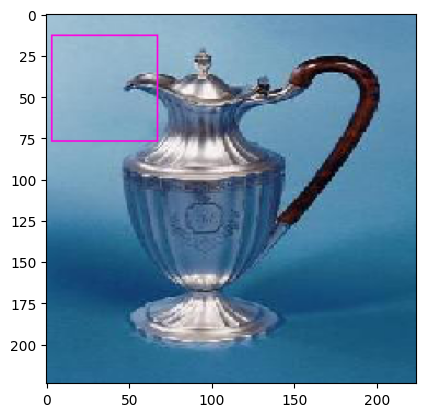

In [6]:
# Select the layer to visualize
last_conv_layer = model.get_layer('conv2')

# Define the gradient model
grad_model = keras.models.Model([model.inputs], [last_conv_layer.output, model.output])

# Load an image
img_path = '/content/drive/MyDrive/DLA5/Group_1/train/ewer/image_0004.jpg'
img = keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
preds = model.predict(img_array)
class_idx = np.argmax(preds[0])

# Generate the heatmap
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img_array)
    loss = predictions[:, class_idx]

grads = tape.gradient(loss, conv_outputs)[0]
guided_grads = (tf.cast(conv_outputs > 0, "float32") * tf.cast(grads > 0, "float32") * grads)

heatmap = tf.reduce_mean(guided_grads, axis=(0, 1))
# Add two dimensions to the heatmap tensor
heatmap = tf.expand_dims(tf.expand_dims(heatmap, 0), -1)
# Resize the heatmap to match the size of the input image
heatmap = tf.image.resize(heatmap, size=(img_array.shape[1], img_array.shape[2]))
# Remove the extra dimensions added above
heatmap = tf.squeeze(heatmap)
# Normalize the heatmap
heatmap = heatmap.numpy()
heatmap /= np.max(heatmap)

# Get the top activations
num_patches = 5 # Change this value to change the number of patches to visualize
patch_size = 32 # Change this value to change the size of the patches
top_activations = []
for i in range(num_patches):
    activation_value = np.max(heatmap)
    if activation_value == 0:
        break
    row, col = np.unravel_index(np.argmax(heatmap), heatmap.shape)
    top_activations.append((row, col, activation_value))
    heatmap[max(0, row-patch_size):min(img_array.shape[0], row+patch_size),
            max(0, col-patch_size):min(img_array.shape[1], col+patch_size)] = 0

# Overlay the patches on the input image
border_color = (255, 0, 225) # Change this value to change the color of the patch borders
border_thickness = 1 # Change this value to change the thickness of the patch borders
img_with_patches = img_array[0].copy()
for (row, col, activation_value) in top_activations:
    patch = img_array[0, max(0, row-patch_size):min(img_array.shape[0], row+patch_size),
                       max(0, col-patch_size):min(img_array.shape[1], col+patch_size)]
    cv2.rectangle(img_with_patches, (col-patch_size, row-patch_size),
                  (col+patch_size, row+patch_size), border_color, border_thickness)
    
# Display the input image with patches
plt.imshow(np.uint8( img_with_patches))
plt.show()